In [1]:
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

### Making non-silent arrays for all speakers

In [2]:
directory_nums = []
speech_nums = []

for num in range(51):
    if num <= 9:
        directory_nums.append('_000{}'.format(num))
    elif 10 <= num <= 25 and num != 22:
        directory_nums.append('_00{}'.format(num))
    elif 26 <= num and num != 29:
        directory_nums.append('00{}'.format(num))
        
for num in range(51):
    if num <= 9:
        speech_nums.append('_000{}_00002'.format(num))
    elif 10 <= num <= 25 and num != 22:
        speech_nums.append('_00{}_00002'.format(num))
    elif 26 <= num <= 32 and num != 29:
        speech_nums.append('{}_002'.format(num))
    elif 33 <= num:
        speech_nums.append('00{}_002'.format(num))
        
len(directory_nums), len(speech_nums)


(49, 49)

In [3]:
speakers_ns = []

for speaker_num, speech_file in zip(directory_nums, speech_nums):
    filename = 'C:\\Users\\danaz\\Desktop\\AudioData\\50_speakers_audio_data\\Speaker{}\\Speaker{}.wav'.format(speaker_num, speech_file)

    y, sr = librosa.load(filename)
    org_len = len(y)
    intervals = librosa.effects.split(y, top_db= 15, ref= np.max)
    intervals = intervals.tolist()
    y_ns = (y.flatten()).tolist()
    nonsilent_y = []

    for p,q in intervals :
        nonsilent_y = nonsilent_y + y_ns[p:q+1] 

    y_ns = np.array(nonsilent_y)
    speakers_ns.append(y_ns)

c:\users\danaz\appdata\local\programs\python\python38\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [4]:
durations = [librosa.get_duration(speech) for speech in speakers_ns]

nums = [el for el in range(51)]
nums.pop(22)
nums.pop(29)

list(zip(nums, durations))

[(0, 36.284353741496595),
 (1, 43.61442176870748),
 (2, 33.07201814058957),
 (3, 36.888390022675736),
 (4, 34.241678004535146),
 (5, 32.65451247165533),
 (6, 27.801315192743765),
 (7, 35.33229024943311),
 (8, 36.98031746031746),
 (9, 36.2071201814059),
 (10, 33.81455782312925),
 (11, 40.96698412698413),
 (12, 40.64045351473923),
 (13, 32.69854875283447),
 (14, 25.268616780045352),
 (15, 35.53442176870748),
 (16, 16.142902494331064),
 (17, 24.551201814058956),
 (18, 25.45514739229025),
 (19, 37.159727891156464),
 (20, 39.064897959183675),
 (21, 21.508344671201815),
 (23, 31.378775510204083),
 (24, 30.007891156462584),
 (25, 42.613786848072564),
 (26, 35.159954648526075),
 (27, 40.26956916099773),
 (28, 20.90331065759637),
 (29, 47.34938775510204),
 (31, 20.18199546485261),
 (32, 34.32453514739229),
 (33, 18.743718820861677),
 (34, 34.395102040816326),
 (35, 31.399637188208615),
 (36, 40.45727891156463),
 (37, 23.527437641723356),
 (38, 34.9984126984127),
 (39, 17.41968253968254),
 (40, 

In [5]:
min(durations), max(durations)

(16.142902494331064, 47.34938775510204)

### Making 4-second chunks for every speaker

In [6]:
speakers_ns_chunks = []

chunk_duration = 4

for speaker in speakers_ns:
    speaker = speaker[:-(len(speaker) % (chunk_duration * 22050))]
    speaker_chunks = np.split(speaker, len(speaker)// (chunk_duration * 22050))
    speakers_ns_chunks.append(speaker_chunks)

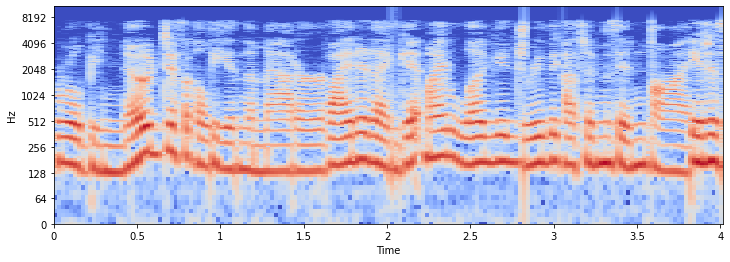

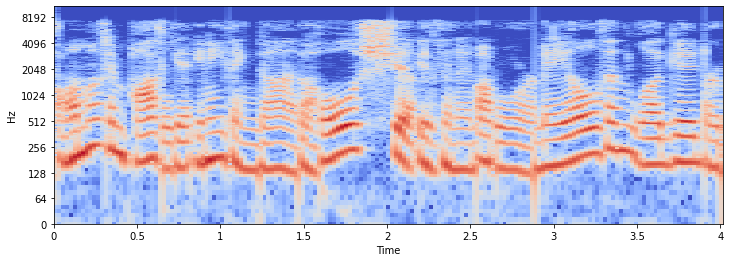

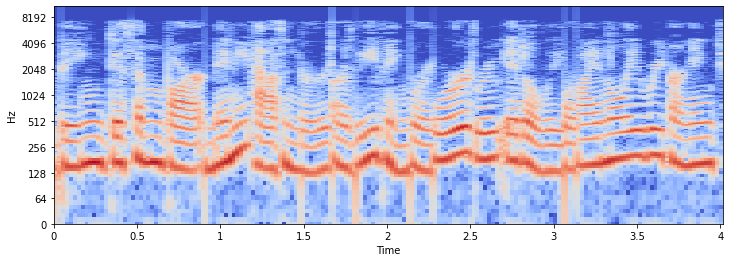

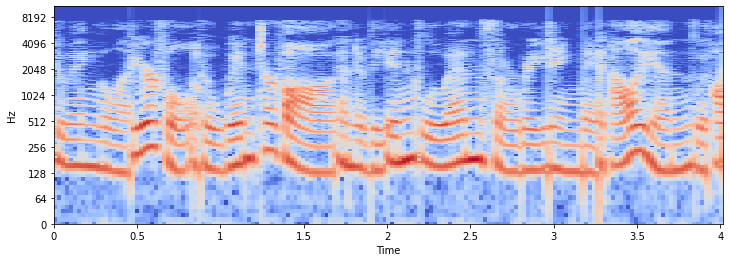

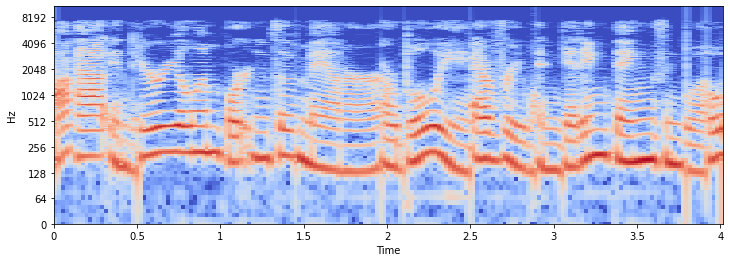

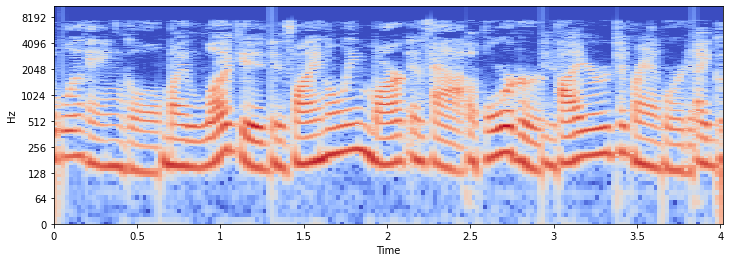

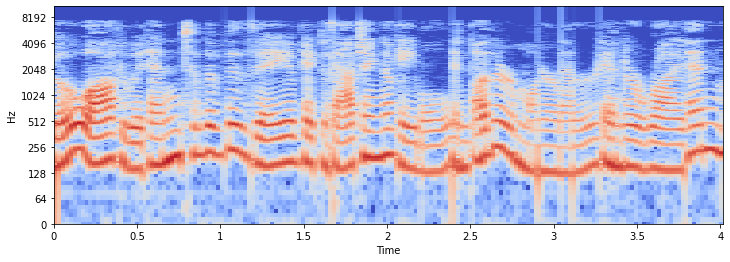

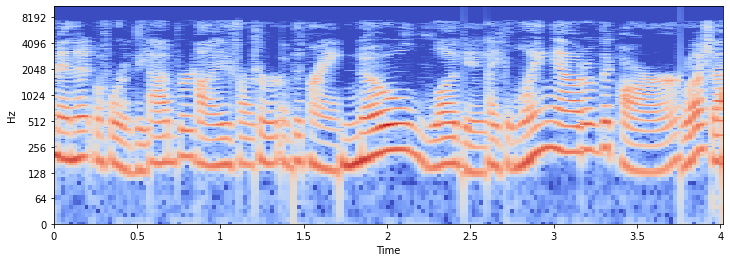

In [7]:
chunks = speakers_ns_chunks[10]

for chunk in chunks:
    X = librosa.stft(chunk)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='log')
    plt.show()

In [9]:
speaker_nums = [num for num in range(51) if num != 22 and num != 29]
chunk_nums = []
directory_names = ['speaker{}'.format(num) for num in speaker_nums]
file_names = []

for el in speakers_ns_chunks:
    chunk_nums.append([num for num in range(len(el))])
    
for speaker_num, speaker_chunk_nums in zip(speaker_nums, chunk_nums):
    for chunk in speaker_chunk_nums:
        file_names.append('speaker{}_chunk{}'.format(speaker_num, chunk))

### Saving images to directories

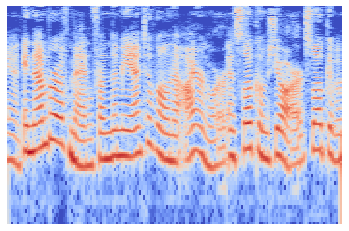

In [37]:
# i = 0
# j = 0

# for speaker in speakers_ns_chunks:
#     for chunk in speaker:
#         X = librosa.stft(chunk)
#         Xdb = librosa.amplitude_to_db(abs(X))
#         img = librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='log')
#         plt.axis('off')
#         plt.savefig('Speakers\\{}\\{}'.format(directory_names[i], file_names[j]))
#         j += 1
#     i += 1 

In [ ]:
# Make audio faster:

# y_3x = librosa.resample(y_ns, sr, sr/8.0)

# X = librosa.stft(y_3x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(12, 4))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.show()